In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv("C:\\data science class\\assignments\\SVM_compl\\mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.isnull().sum()
#no null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

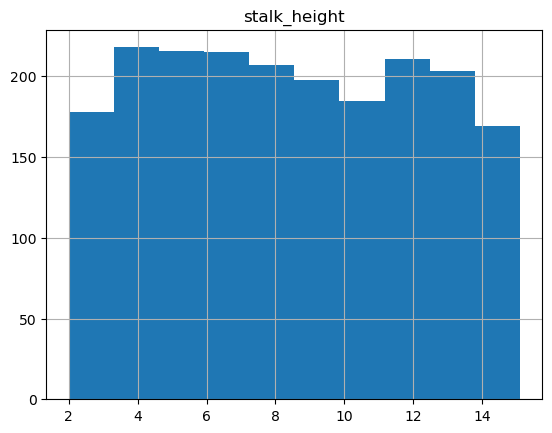

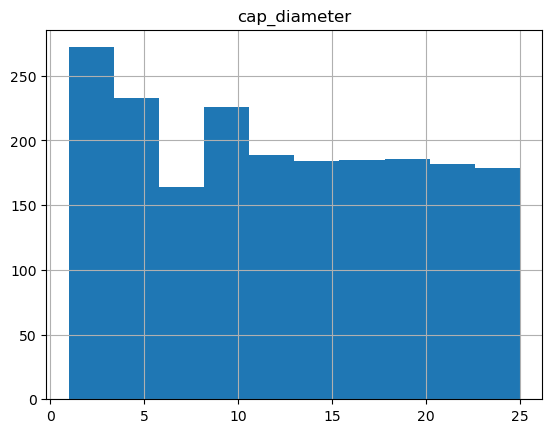

In [4]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
df['stalk_height'].hist()
plt.title('stalk_height')
plt.show()

df['cap_diameter'].hist()
plt.title('cap_diameter')
plt.show()

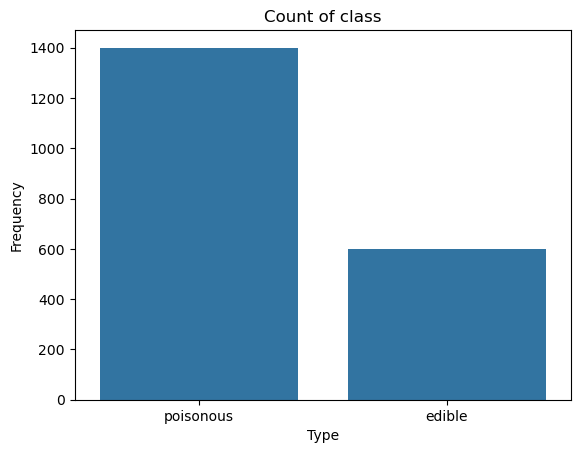

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='class')
plt.title('Count of class')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

In [6]:
#Data Transformation
from sklearn.preprocessing import StandardScaler, LabelEncoder
SS = StandardScaler()
LE = LabelEncoder()

le=df.iloc[:,1:24].apply(LE.fit_transform)
le
ss= SS.fit_transform(df.iloc[:,24:26])
ss= pd.DataFrame(ss)
ss.columns=['stalk_height', 'cap_diameter']
ss

df_new= pd.concat([le,ss],axis=1)
df_new

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,1.576459,-1.030123
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,-1.216463,0.958407
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,0.163717,-0.724904
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,-0.871852,1.222967
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,1.511897,0.032765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,-0.695623,0.730771
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,-0.527090,0.168525
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,1.382181,-0.148193
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,0.715199,-0.552164


In [7]:
#Specify Features and Target Variables
X= df_new.drop(columns='class')
y= df_new['class']

In [8]:
#data Partition
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
# Linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear',C = 1)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_test))

Training score: 0.71
Test score: 0.67
Confusion Matrix:
 [[  0 133]
 [  0 267]]


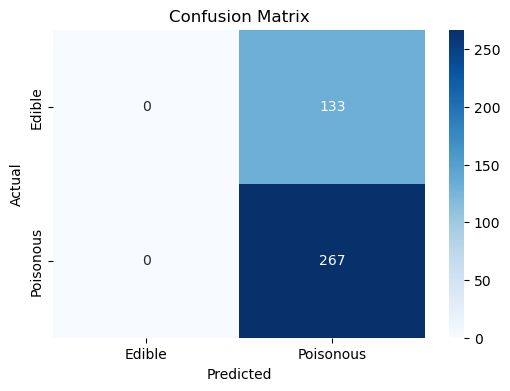

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, Y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Edible', 'Poisonous']) # Adjust labels
plt.yticks([0.5, 1.5], ['Edible', 'Poisonous']) # Adjust labels
plt.show()

In [11]:
# poly
from sklearn.svm import SVC
model = SVC(kernel='poly',degree=3)
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_test))

Training score: 0.79
Test score: 0.74
Confusion Matrix:
 [[ 36  97]
 [  7 260]]


In [12]:
# rbf classifier
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
score1 = accuracy_score(Y_train,Y_pred_train)
score2 = accuracy_score(Y_test,Y_pred_test)

print("Training score:", np.round(score1, 2))
print("Test score:", np.round(score2, 2))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_test))

Training score: 0.72
Test score: 0.68
Confusion Matrix:
 [[  7 126]
 [  0 267]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'degree': list(range(1, 26)),
              'kernel': ['poly', 'rbf','linear'],
             'C':[0.1,1,10,100]}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the grid search to the data
grid.fit(X_train, Y_train)

# Print the best parameters and best score
print(grid.best_params_)
print(grid.best_estimator_)

# Make predictions using the best model
grid_predictions = grid.predict(X_test)

# Evaluate the model
print(accuracy_score(Y_test, grid_predictions))


Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.706 total time=   0.0s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.709 total time=   0.0s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.709 total time=   0.0s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.709 total time=   0.0s
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 1/5] END ....C=0.1, degree=1, kernel=linear;, score=0.706 total time=   0.0s
[CV 2/5] END ....C=0.1, degree=1, kernel=line